In [20]:
### Make syntethic lightcurves
import numpy as np
import matplotlib.pyplot as plt

def generate_lc(i, e, omega, **kwargs):
    # Convert to radians
    i *= np.pi / 180
    omega *= np.pi / 180
    # Get the separation vector from ecentricity
    theta = np.linspace(0, 2*np.pi, 300) + np.pi
    phase = theta / 2 / np.pi
    r = 1 / (1 + e * np.cos(theta))
    peri_ind = np.argmin(r)
    # Plot lighcurve in the neighorhood of periapse
    #i_rmin = np.argmin(r)
    #r = r[i_rmin-100:i_rmin+100]
    #theta = theta[i_rmin-100:i_rmin+100]
    # Use lightcurve expression from from Kumar et al 1995
    delf_over_f = (1 - 3*np.sin(i)**2 * np.sin(theta - omega)**2) / r
    phase = theta / 2 / np.pi
    return phase, delf_over_f, peri_ind

i = 70
e = 0.6
omega = -75

inclinations = np.linspace(0, 90, 100)
omegas = np.linspace(-90, 90,100)

from matplotlib import gridspec
'''
def make_fig():
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(20,7))
    gs = gridspec.GridSpec(nrows=2, ncols=5)
    ax1 = fig.add_subplot(gs[0,:-2])
    ax2 = fig.add_subplot(gs[1,:-2])
    ax3 = fig.add_subplot(gs[:, -2:])
    return fig, ax1, ax2, ax3


for i in range(100):
    fig, ax1, ax2, ax3 = make_fig()
    phase, flux = generate_lc(i=inclinations[i], e=0.6, omega=0)
    ax1.plot(phase, flux, color='red')
    ax1.set_ylim((-3, 2))
    ax3.plot(inclinations[i], 0, 'o', color='red')
    ax3.plot(inclinations[:i+1], (i+1)*[0], '--', color='red')
    
    phase, flux = generate_lc(i=45, e=0.6, omega=omegas[i])
    ax2.plot(phase, flux, color='blue')
    ax2.set_ylim((-3, 2))
    ax3.plot(45, omegas[i], 'o', color='blue')
    ax3.plot((i+1)*[45], omegas[:i+1], '--', color='blue')
    
    ax3.set_ylim((-100, 100))
    ax3.set_xlim((-10, 100))
    
    ax1.set_xlim((min(phase), max(phase)))
    ax2.set_xlim((min(phase), max(phase)))
    
    ax1.set_ylabel('$\\frac{\delta F}{F}$', fontsize=25)
    ax2.set_ylabel('$\\frac{\delta F}{F}$', fontsize=25)
    ax1.text(0.69, -2.5, '$(i, \omega) = (%d, %d)$' % (inclinations[i], 0), fontsize=20)
    ax2.text(0.69, -2.5, '$(i, \omega) = (%d, %d)$' % (45, omegas[i]), fontsize=20)
    
    ax3.set_xlabel('Inclination angle (deg)', font='Times New Roman', fontsize=20)
    ax3.set_ylabel('Periapse angle (deg)',font='Times New Roman', fontsize=20)
    
    ax1.text(0.95, -3.9, '$\\theta(t)$',fontsize=20)
    ax3.grid()
    plt.subplots_adjust(wspace=0.9)
    plt.suptitle("Sythentic Lightcurve Model (Kumar et. al 1995) $[e=0.6]$", font='Times New Roman', fontsize=25)
    plt.savefig('figures/kumar_lk_%03d.png' % i)
    plt.close()
    '''

'\ndef make_fig():\n    plt.style.use(\'dark_background\')\n    fig = plt.figure(figsize=(20,7))\n    gs = gridspec.GridSpec(nrows=2, ncols=5)\n    ax1 = fig.add_subplot(gs[0,:-2])\n    ax2 = fig.add_subplot(gs[1,:-2])\n    ax3 = fig.add_subplot(gs[:, -2:])\n    return fig, ax1, ax2, ax3\n\n\nfor i in range(100):\n    fig, ax1, ax2, ax3 = make_fig()\n    phase, flux = generate_lc(i=inclinations[i], e=0.6, omega=0)\n    ax1.plot(phase, flux, color=\'red\')\n    ax1.set_ylim((-3, 2))\n    ax3.plot(inclinations[i], 0, \'o\', color=\'red\')\n    ax3.plot(inclinations[:i+1], (i+1)*[0], \'--\', color=\'red\')\n    \n    phase, flux = generate_lc(i=45, e=0.6, omega=omegas[i])\n    ax2.plot(phase, flux, color=\'blue\')\n    ax2.set_ylim((-3, 2))\n    ax3.plot(45, omegas[i], \'o\', color=\'blue\')\n    ax3.plot((i+1)*[45], omegas[:i+1], \'--\', color=\'blue\')\n    \n    ax3.set_ylim((-100, 100))\n    ax3.set_xlim((-10, 100))\n    \n    ax1.set_xlim((min(phase), max(phase)))\n    ax2.set_xlim((

149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149


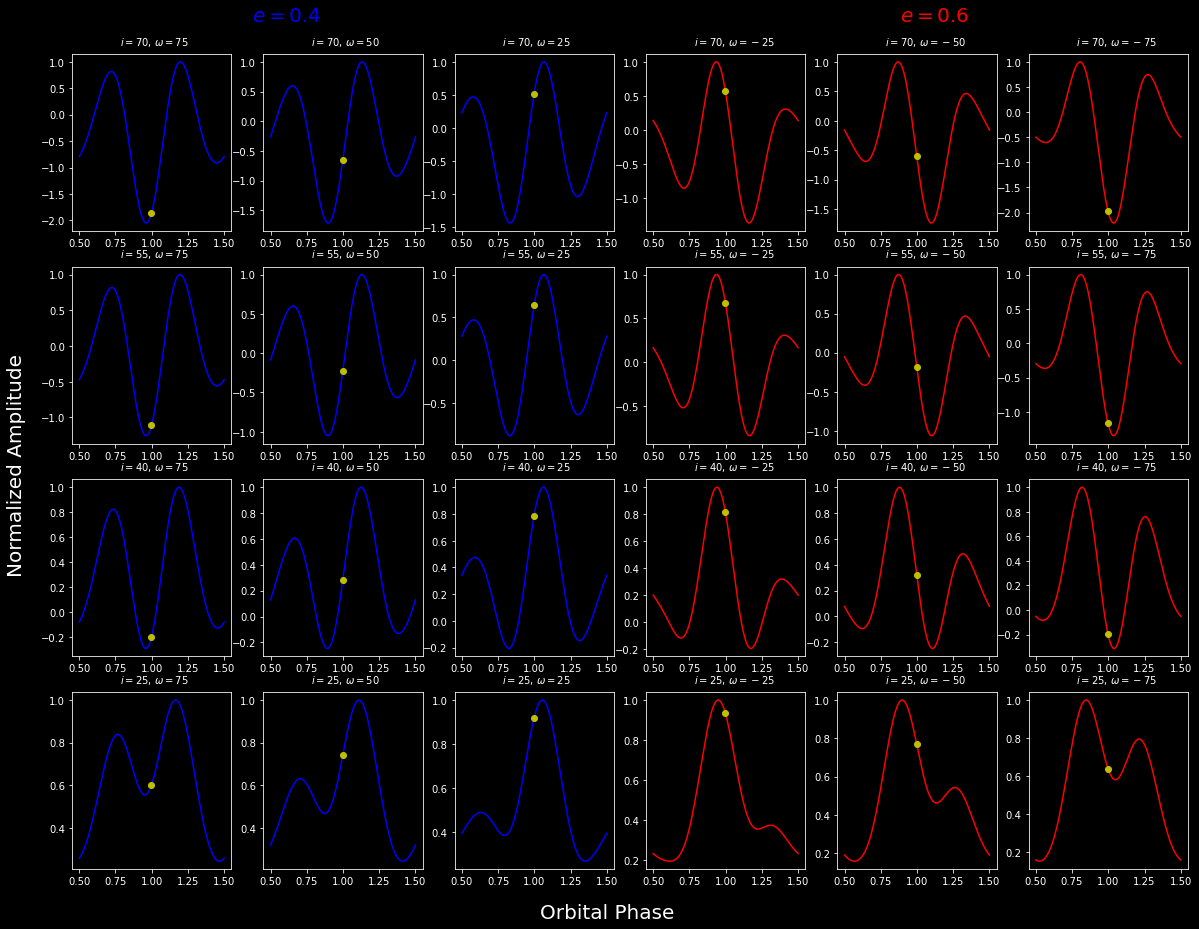

In [24]:
'''Reproduce fig 5 of Thompson paper'''
# Different inclinations and periastron angles
inclinations = [70, 55, 40, 25]
omegas = [75, 50, 25, -25, -50, -75]

# Create plots
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20,15))

for i, inc in enumerate(inclinations):
    for j, omega in enumerate(omegas):
        if j<=2:    ecc, color = 0.4, 'blue'
        else:       ecc, color = 0.6, 'red'
        phase, flux, pind = generate_lc(inc, ecc, omega)
        flux /= max(flux)
        axes[i,j].plot(phase, flux, color=color)
        axes[i,j].plot(phase[pind], flux[pind], 'yo')
        axes[i,j].text(x=0.3, y=1.05, s='$i=%d$, $\omega=%d$'%(inc, omega),
                        transform=axes[i,j].transAxes)
        
plt.gcf().text(0.08, 0.4, 'Normalized Amplitude', fontsize=20, rotation=90)
plt.gcf().text(0.45, 0.08, 'Orbital Phase', fontsize=20)
plt.gcf().text(0.25, 0.91, '$e=0.4$', color='blue', fontsize=20)
plt.gcf().text(0.7, 0.91, '$e=0.6$', color='red', fontsize=20)
        
plt.savefig('figures/thompson_fig5.png')


